In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('Iris.csv')
print(df.head())
print(df.info())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [2]:
df = df.drop('Id', axis=1)

X = df.drop('Species', axis=1)
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features shape:", X_scaled.shape)
print("First 5 rows of normalized features:\n", X_scaled[:5])

Features shape: (150, 4)
First 5 rows of normalized features:
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (120, 4)
Test set shape: (30, 4)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [5]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
y_pred = knn.predict(X_test)

print("Predicted labels:", y_pred[:10])
print("Actual labels:   ", y_test.values[:10])

Predicted labels: ['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor']
Actual labels:    ['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor']


In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.9333333333333333


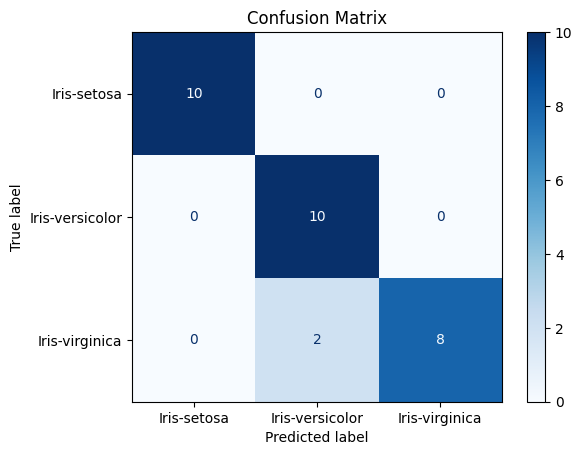

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

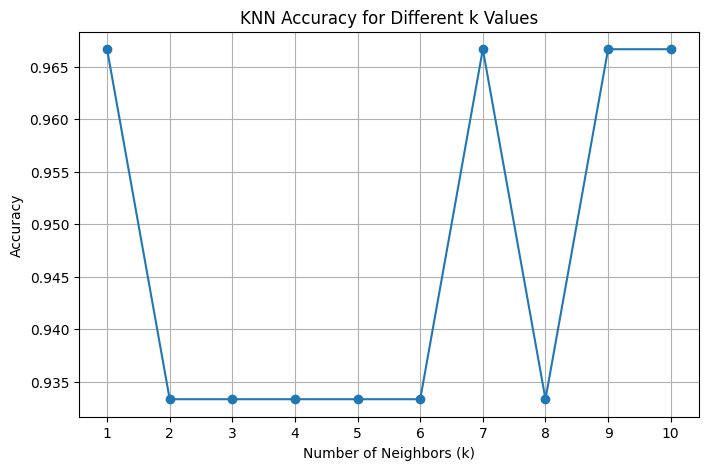

In [10]:
accuracies = []

for k in range(1, 11):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_pred_k = knn_k.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [12]:
X_vis = X_scaled[:, :2]

In [13]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape (2 features):", X_train_vis.shape)
print("Test set shape (2 features):", X_test_vis.shape)

Training set shape (2 features): (120, 2)
Test set shape (2 features): (30, 2)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)

KNeighborsClassifier(n_neighbors=3)

In [15]:
import numpy as np

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

print("Mesh grid shape:", xx.shape)

Mesh grid shape: (378, 319)


In [16]:
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

print("Prediction grid shape:", Z.shape)

Prediction grid shape: (378, 319)


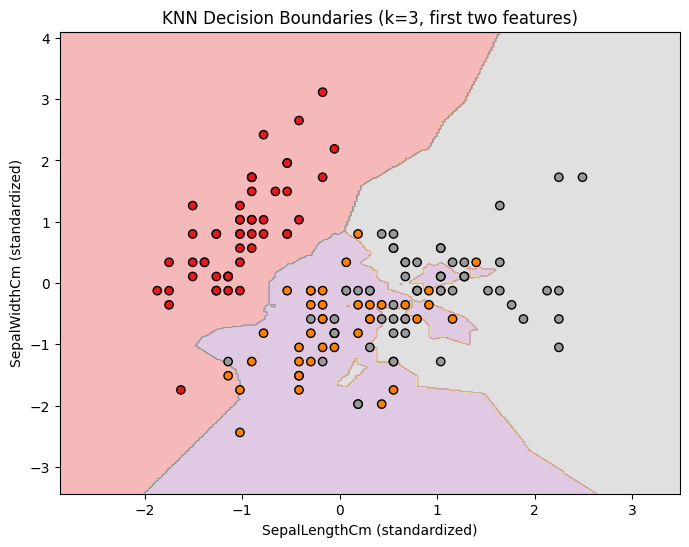

In [18]:
import pandas as pd

class_labels = knn_vis.classes_

label_to_int = {label: idx for idx, label in enumerate(class_labels)}

Z_int = np.vectorize(label_to_int.get)(Z)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_int, alpha=0.3, cmap=plt.cm.Set1)

plt.scatter(X_vis[:, 0], X_vis[:, 1], c=pd.Categorical(y).codes, edgecolor='k', cmap=plt.cm.Set1)

plt.xlabel('SepalLengthCm (standardized)')
plt.ylabel('SepalWidthCm (standardized)')
plt.title('KNN Decision Boundaries (k=3, first two features)')
plt.show()